In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [97]:
df = pd.read_csv('/content/drive/My Drive/CSC 240 Final Project/DataSet/CorrectFinalMaskOff.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1
0,0,0,0,1246149928143007700,Doris Kleinhenz,2756330410,NaN,"“Feds distribute thousands of masks, other sup...",Neutral,>40,Female,Apr03,18:57:49,"GreaterEuropean,WestEuropean,Germanic",0.0000,KleinhenzdDoris,NaN
1,1,1,1,1246236523835453400,Bohemian59💙🇺🇸❤️,786439079504117760,NaN,"❌Texas — yes, TEXAS city moves to fine people ...",Positive,>40,Female,Apr04,00:41:55,"GreaterAfrican,Africans",0.7269,Arteesta1959,NaN
2,2,2,2,1245987058272948200,Alvytana Mavua,78564346,Nairobi,AT_USER The first and most important is to rap...,Positive,19-29,Male,Apr03,08:10:38,"GreaterAfrican,Africans",0.1513,Mavua,NaN
3,3,3,3,1245941329651269600,killmonger'son,839285340955426821,"Tembisa, South Africa",This is horrific. Two French doctors on live t...,Negative,>40,Male,Apr03,05:08:56,"GreaterEuropean,British",-0.5892,sizwe11121,NaN
4,4,4,4,1246037533382914000,Pedro Goncalves,117716541,United Kingdom,"Aircraft carriers, navy ships, military bases ...",Negative,19-29,Male,Apr03,11:31:12,"GreaterEuropean,WestEuropean,Hispanic",-0.5463,SlowGoncalves,NaN


In [37]:
# We only want text
df = df['text']
df.head()

0    “Feds distribute thousands of masks, other sup...
1    ❌Texas — yes, TEXAS city moves to fine people ...
2    AT_USER The first and most important is to rap...
3    This is horrific. Two French doctors on live t...
4    Aircraft carriers, navy ships, military bases ...
Name: text, dtype: object

In [38]:
print(len(df))

243994


In [92]:
df_tweets.head()

,Text
0,"“Feds distribute thousands of masks, other sup..."
1,"❌Texas — yes, TEXAS city moves to fine people ..."
2,AT_USER The first and most important is to rap...
3,This is horrific. Two French doctors on live t...
4,"Aircraft carriers, navy ships, military bases ..."


In [40]:
# import nltk
# nltk.download('stopwords')

# from nltk.corpus import stopwords
# en_stop_words = set(stopwords.words('english'))
# list(en_stop_words)[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['me', 'if', 'in', "weren't", "you're", "isn't", 'their', 'these', 'on', 'was']

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
import nltk
nltk.download('stopwords')
import pandas as pd
import re
import math
import string

def clean_tweets(df=df, tweet_col='text'):
    
    df_copy = df.copy()
    
    # drop rows with empty values
    df_copy.dropna(inplace=True)
    
    # lower the tweets
    df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.lower()
    df_copy['preprocessed_' + tweet_col] = df_copy[tweet_col].str.translate(str.maketrans('', '', string.punctuation))
    # filter out stop words and URLs
    en_stop_words = set(stopwords.words('english') + ['url', 'at_user', 'masks', 'Masks', 'facemasks', 'Facemasks', 'url', 'mask', 'Mask', 'coronavirus', 'Coronavirus', 'Coronavirus!', 'coronovirus', 'COVID-19', 'covid19', 'at_user', 'face', 'covid', 'COVID'] + ['&amp;', 'rt','th','co', 're', 've', 'kim', 'daca'])
    print(en_stop_words)
    url_re = '(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'        
    
    df_copy['preprocessed_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: ' '.join([w for w in row.split() if (not w in en_stop_words) and (not re.match(url_re, w))]))
    # tokenize the tweets
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
    df_copy['tokenized_' + tweet_col] = df_copy['preprocessed_' + tweet_col].apply(lambda row: tokenizer.tokenize(row))
    
    return df_copy
  
df_tweets_clean = clean_tweets(df)
df_tweets_clean.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'me', 'if', 'in', 'Mask', "weren't", "you're", "isn't", 'their', 'these', 'on', 'was', 'him', 'needn', 'mask', 'her', 'so', 't', "mightn't", "mustn't", 'Masks', 'off', 'any', 'just', 'isn', 'd', 'facemasks', 'should', 'most', 've', 'shouldn', 'this', 'kim', 'the', 'those', 'our', 'is', "doesn't", 'Facemasks', 'only', 'when', 'nor', 'own', "don't", 'more', 'ain', "that'll", 'before', 'am', 'o', 'aren', "shouldn't", 'Coronavirus', 'ourselves', 'themselves', 'we', 'your', 'each', 'myself', "should've", 're', "aren't", 'because', 'to', 'yourselves', "needn't", 'why', 'from', 'hers', 'COVID-19', 'for', "shan't", 'than', 'covid19', 'co', 'against', 'didn', 'during', 'such', 'out', 'himself', 'will', 'll', 'again', 'yourself', 'its', 'about', 'which', 'how', 'same', 'theirs', 'under', 'coronavirus', 'too', 'rt', 'all', 'hasn', 'being', 's', 'until', 'as', 'been', 'a', 'it', 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tweet_id,name,id,location,text,sentiment,age,gender,date,time,race,score,screen_name,Unnamed: 0.1.1.1,preprocessed_text,tokenized_text
31580,15831,0,0,1248032617682727000,San Bernardino County District Attorney's Office,274879556,San Bernardino County,Mary (front) used her own money to buy masks f...,Positive,>40,Male,Apr08,23:38:58,"GreaterEuropean,British",0.8622,sbcountyda,0.0,Mary front used money buy surgical techs work ...,"[Mary, front, used, money, buy, surgical, tech..."
31581,15832,1,1,1248030713732927500,Cipta Adhi Prakasa,86917747,Indonesia,From bags to mask | This week we've turned our...,Positive,19-29,Male,Apr08,23:31:24,"Asian,IndianSubContinent",0.6239,caprakasa,1.0,From bags This week weve turned San Francisco ...,"[From, bags, This, week, weve, turned, San, Fr..."
31582,15833,2,2,1248045241694707700,Sydney Cat Cuddler,37584660,"Sydney, New South Wales",Air crew who flew in from coronavirus capital ...,Negative,30-39,Female,Apr09,00:29:07,"GreaterEuropean,British",-0.1280,Jacqi_Foster,2.0,Air crew flew capital Wuhan 90 tonnes medical ...,"[Air, crew, flew, capital, Wuhan, tonnes, medi..."
31586,15837,6,6,1247831538428858400,Alekhya,15142772,"Mumbai, India",Commissioner of BMC has issued compulsory inst...,Neutral,19-29,Female,Apr08,10:19:57,"GreaterAfrican,Muslim",0.0000,alekhya,6.0,Commissioner BMC issued compulsory instruction...,"[Commissioner, BMC, issued, compulsory, instru..."
31591,15842,11,11,1247848247189590000,Cherryl Lou Templado,1247173400595841024,Republic of the Philippines,Keep your guard against Coronavirus! Esp when ...,Positive,19-29,Female,Apr08,11:26:20,"GreaterEuropean,WestEuropean,Hispanic",0.5093,LouCherryl,11.0,Keep guard Esp buy goodies wear bring spray al...,"[Keep, guard, Esp, buy, goodies, wear, bring, ..."


In [118]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for tweet in df_tweets_clean.tokenized_text for word in tweet],20)

[('url', 72760),
 ('covid19', 46670),
 ('atuser', 32480),
 ('amp', 23939),
 ('the', 21822),
 ('us', 20069),
 ('wear', 15830),
 ('n95', 14939),
 ('trump', 13694),
 ('medical', 13119),
 ('million', 12994),
 ('people', 12721),
 ('this', 12612),
 ('we', 12504),
 ('china', 12137),
 ('workers', 12037),
 ('wearing', 11260),
 ('need', 10434),
 ('protective', 9609),
 ('help', 9512)]

In [119]:
# build a dictionary where for each tweet, each word has its own id.
# We have 6882 tweets and 10893 words in the dictionary.
tweets_dictionary = Dictionary(df_tweets_clean.tokenized_text)

# build the corpus i.e. vectors with the number of occurence of each word per tweet
tweets_corpus = [tweets_dictionary.doc2bow(tweet) for tweet in df_tweets_clean.tokenized_text]

# compute coherence
tweets_coherence = []
for nb_topics in range(1,36):
    lda = LdaModel(tweets_corpus, num_topics = nb_topics, id2word = tweets_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=tweets_corpus, dictionary=tweets_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    tweets_coherence.append(coh)



NameError: ignored

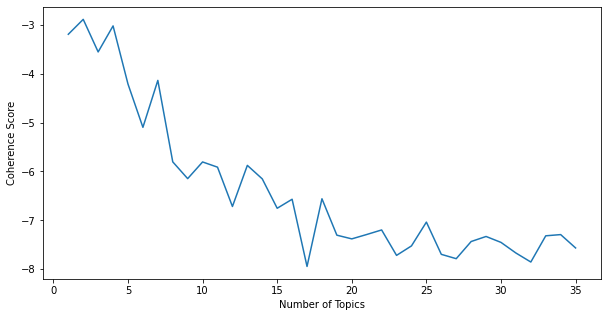

In [120]:
import matplotlib.pyplot as plt


# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,36),tweets_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

ERROR: Could not find a version that satisfies the requirement gridspec (from versions: none)
ERROR: No matching distribution found for gridspec


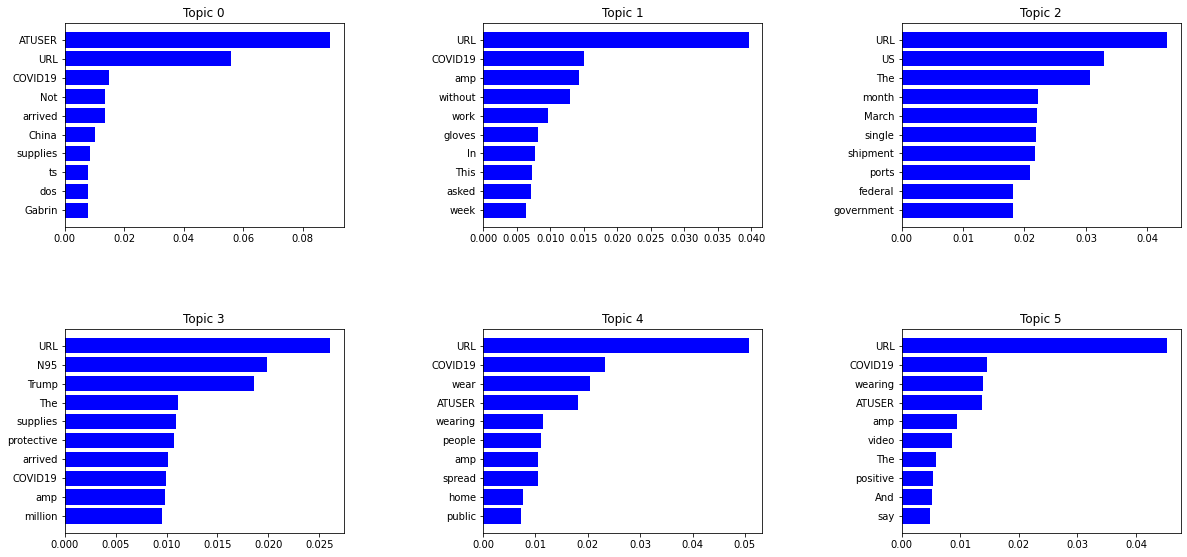

In [124]:
import matplotlib.gridspec as gridspec

k = 6
tweets_lda = LdaModel(tweets_corpus, num_topics = k, id2word = tweets_dictionary, passes=10)

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()